## 1. Introduction to Exploratory Data Analysis
Exploring your data is a crucial step in your analysis.
### 1.1. Theory.
####  Exploratory data analysis
>- When I say exploring your data, I mean organizing and plotting your data, and maybe computing a few numerical summaries about them.
>- This idea is known as `exploratory data analysis`, or `EDA`, and was developed by one of the greatest statisticians of all time, `John Tukey`. He wrote a book entitled `Exploratory Data Analysis` in 1977 where he laid out the principles.
>- In that book, he said, `"Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone."` I wholeheartedly agree with this, so we will begin our study of statistical thinking with `EDA`. 

Let's consider an example.

#### 2008 US swing state election results
Here, we have a data set I acquired from data dot `gov` containing the election results of 2008 at the county level in each of the three major swing states of `Pennsylvania`, `Ohio`, and `Florida`. Those are the ones that largely decide recent elections in the US. 

This is how they look when I open the file with my text editor. They are a little prettier if we look at them with in a `Pandas DataFrame`, in this case only looking at the columns of immediate interest, the state, county, and share of the vote that went to `Democrat` Barack Obama.

In [1]:
import pandas as pd
df_swing = pd.read_table(r'../input/think-stats-dataset/2008 election results (swing states).txt',
                         sep = ',', usecols = ['state', 'county', 'dem_share'])
df_swing.head()

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04


We could stare the these numbers, but I think you'll agree that it is pretty hopeless to gain any sort of understanding from doing this. 

Alternatively, we could charge in headlong and start defining and computing parameters and their confidence intervals, and do `hypothesis tests`. 

You will learn how to do all of these things in this course and its sequel. But a good field commander does not just charge into battle without first getting a feel for the terrain and sizing up the opposing army. So, like the field commander, we should explore the data first. 

In this chapter, we will discuss graphical exploratory data analysis. This involves taking data from tabular form, like we have here in the `DataFrame`, and representing it graphically. You are presenting the same information, but it is in a more human-interpretable form. For example, we take the `Democratic` share of the vote in the counties of all of the `three swing states` and plot them as a `histogram`. The height of each bar is the number of counties that had the given level of support for Obama. 

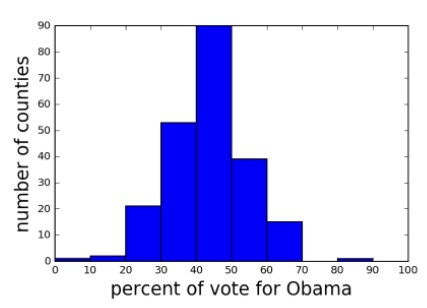

In [2]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

For example, the tallest bar is the number of counties that had between `40%` and `50%` of its votes cast for Obama. Right away, because there is more area in the `histogram` to the left of `50%`, we can see that more counties voted for Obama's opponent, `John McCain`, than voted for Obama. Look at that. 

Just by making one plot, we could already draw a conclusion about the data, which would have been `extraordinarily` tedious by hand counting in the `DataFrame`.

### 1.2. PRACTICES
#### Exercise 1.2.1. Tukey's comments on `EDA`
Even though you probably have not read `Tukey's book`, I suspect you already have a good idea about his `viewpoint` from the `theory(abstract)` introducing you to `exploratory data analysis`. Which of the following quotes is not directly from Tukey?
>- A. `Exploratory data analysis` is detective work.
>- B. There is no excuse for failing to plot and look.
>- C. The greatest value of a picture is that it forces us to notice what we never expected to see.
>- D. It is important to understand what you can do before you learn how to measure how well you seem to have done it.
>- E. Often times `EDA` is too time consuming, so it is better to jump right in and do your hypothesis tests.
#### Answer & explaination.
>- A, B, C, D. Incorrect!!!Turkey said that.
>- **E. Correct!!** That statement is pretty absurd. If you don't have time to do EDA, you really don't have time to do hypothesis tests. And you should always do `EDA first`.

#### Exercise 1.2.2. Advantages of graphical EDA
Which of the following is not true of `graphical EDA`?
>- A. It often involves converting `tabular data` into `graphical form`.
>- B. If done well, `graphical representations` can allow for more rapid `interpretation` of data.
>- C. A nice looking plot is always the end goal of a `statistical analysis`.
>- D. There is no excuse for neglecting to do `graphical EDA`.
#### Answers & explaination.
>- A, B, D. Incorrect!! This is true of graphical EDA.
>- **C.Correct!!!** While a good, informative plot can sometimes be the end point of an analysis, it is more like a beginning: it helps guide you in the `quantitative statistical analyses` that come next.

## 2. Plotting a histogram
### 2.1. Theory.
#### 2008 US swing state election results
In the previous section, we are interested in the fraction of the vote that went to Barack Obama in each county. 
#### Generating a histogram
>- We can plot this as a `histogram` using the `matplotlib` dot `pyplot module's` `hist function`. We pass it the dem_share column of the `DataFrame`.

In [3]:
import matplotlib.pyplot as plt

>- We could have also passed a `NumPy array` with the same data, and it works just fine. 

In fact, for this course and its sequel, you can use `DataFrames` and `NumPy arrays` **interchangeably**. 

Note that `plt.hist` returns 3 arrays that I am not interested in; I only want the plot. I therefore assign a `dummy variable` called `"underscore"` to them, which is common practice in `Python`. 

After creating the histogram, we label the axes.

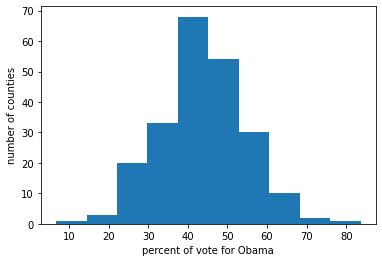

In [4]:
plt.hist(df_swing['dem_share'])
plt.xlabel('percent of vote for Obama')
plt.ylabel('number of counties')
plt.show()

#### Always label your axes
>- Always label your `axes`, for `histograms` or any other kind of `plot`. 
>- Otherwise, **no one can know what it is you are plotting**.

#### 2008 US swing state election results
You probably didn't notice, but this plot looks `slightly different` than the first plot I showed. You can see it if you look at them side-by-side.

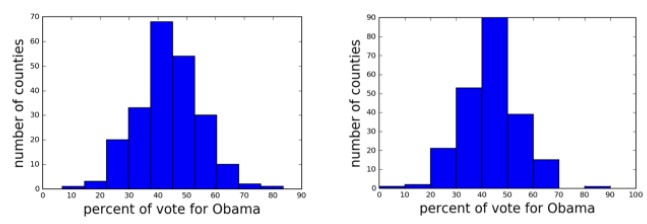

In [5]:
## Hình minh họa Image(fig1, height, width)

#### Histograms with different binning
They are different because they have different binning. In the plot at left, we have ten bins that were automatically generated by the default settings of plt dot hist, and I set up the bins on the right.
#### Setting the bins of a histogram
- I specified where the edges of the bars of the histogram are, the bin edges, and use the bins keyword argument to pass that to plt dot hist.

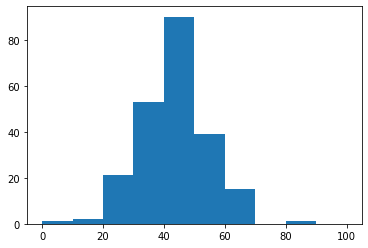

In [6]:
bin_edges = list(range(0, 101, 10))
plt.hist(df_swing['dem_share'], bins = bin_edges)
plt.show()

- We can also specify a number of bins, say 20, using the bins keyword argument, and `Matplotlib` will automatically generate 20 evenly spaced bins. Now, the plots we've made so far are stylized with `Matplotlib's` default settings.

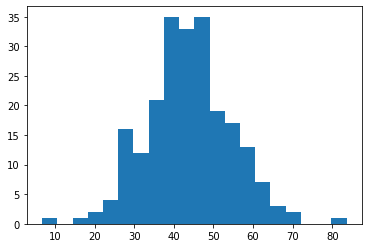

In [7]:
plt.hist(df_swing['dem_share'], bins = 20)
plt.show()

#### Seaborn
I prefer to use the default settings of `Seaborn`, an **`excellent matplotlib-based statistical data visualization`** package written primarily by Michael Waskom.
#### Setting Seaborn styling
We `import` it as `sns`, as is traditionally done. Upon import, we can set the style to be Seaborn's default, using the `sns.set` function.

In [8]:
import seaborn as sns
sns.set()

#### A Seaborn-styled histogram
This results in nicely formatted plots. Beyond this stylistic functionality, Seaborn offers useful plotting functions that we will explore in the next section.

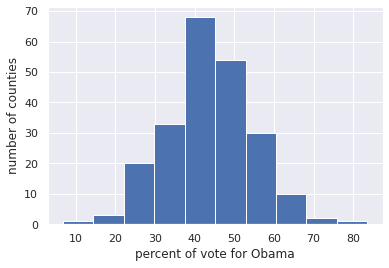

In [9]:
plt.hist(df_swing['dem_share'])
plt.xlabel('percent of vote for Obama')
plt.ylabel('number of counties')
plt.show()

### 2.2. PRACTICES.
#### Exercise 2.2.1. Plotting a histogram of iris data
For the exercises in this section, you will use a classic data set collected by botanist Edward Anderson and made famous by Ronald Fisher, one of the most prolific statisticians in history. Anderson carefully measured the anatomical properties of samples of three different species of `iris`, `Iris setosa`, `Iris versicolor`, and `Iris virginica`. The full data set is available as part of `scikit-learn`. Here, you will work with his measurements of petal length.

Plot a histogram of the `petal lengths` of his 50 samples of Iris versicolor using `matplotlib/seaborn`'s default settings. Recall that to specify the default seaborn style, you can use `sns.set()`, where sns is the alias that `seaborn` is `imported as`.

The subset of the data set containing the `Iris versicolor petal lengths` in units of centimeters (cm) is stored in the `NumPy array` `versicolor_petal_length`.

In the video, Justin plotted the histograms by using the `pandas library` and indexing the DataFrame to extract the desired column. 
>- Here, however, you only need to use the provided NumPy array. Also, Justin assigned his plotting statements (except for `plt.show()`) to the `dummy` variable `_`. This is **to prevent unnecessary output from being displayed**. It is not required for your solutions to these exercises, however it is good practice to use it. 
>- Alternatively, if you are working in an interactive environment such as a Jupyter notebook, you could use a ; after your plotting statements to achieve the same effect. Justin prefers using `_`. Therefore, you will see it used in the solution code.

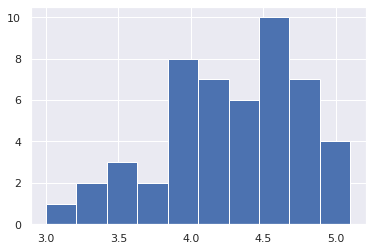

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
versicolor_petal_length = iris['data'][50:100, 2]

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

#### Exercise 2.2.2. Axis labels!
In the last exercise, you made a nice histogram of `petal lengths` of `Iris versicolor`, but you didn't label the axes! That's ok; it's not your fault since we didn't ask you to. 
>- Now, add `axis labels` to the `plo`t using `plt.xlabel()` and `plt.ylabel()`. 
>- Don't forget to add units and assign both statements to `_`. The packages `matplotlib.pyplot` and `seaborn` are already imported with their standard aliases. This will be the case in what follows, unless specified otherwise.
#### SOLUTION.

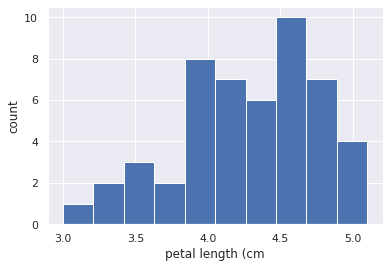

In [11]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
plt.xlabel('petal length (cm')
plt.ylabel('count')

# Show histogram
plt.show()

#### Exercise 2.3.3. Adjusting the number of bins in a histogram
The histogram you just made had ten bins. This is the default of `matplotlib`. 
>- The `"square root rule"` is a commonly-used rule of thumb for choosing number of `bins`: *`choose the number of bins to be the square root of the number of samples`*. 
>- Plot the histogram of `Iris versicolor` `petal lengths` again, this time using the square root rule for the number of bins. You specify the `number of bins` using the bins keyword argument of `plt.hist()`.

The plotting utilities are already imported and the `seaborn` defaults already set. The variable you defined in the last exercise, `versicolor_petal_length`, is already in your namespace.
#### SOLUTION.

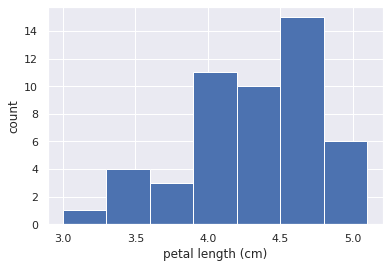

In [12]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins = n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

## 3. Plot all of your data: Bee swarm plots
### 3.1. Theory
#### 2008 US swing state election results
We learned that more counties voted for McCain than for Obama. 
>- Since our goal is to learn from data, this is great! 
>- However, a major drawback of using histograms is that the same data set can look different depending on how the bins are chosen.

And choice of bins is in many ways arbitrary. This leads to `binning bias`.
#### Binning bias.
You might interpret your plot differently for two different choices of `bin number`. An additional problem with `histograms` is that we are not plotting all of the data. We are sweeping the data into `bins`, and losing their actual values.

#### Bee swarm plot
To remedy these problems we can make a bee swarm plot, also called a `swarm plot`. This is best shown by example. 
>- Here is a beeswarm plot of the vote totals in the three swing states. 
>- Each point in the plot represents the share of the vote Obama got in a single county. 
>- The position along the y-axis is the quantitative information. 
>- The data are spread in x to make them visible, but their precise location along the x-axis is unimportant.

Notably, we no longer have any binning bias and all data are displayed. This plot may be conveniently generated using `Seaborn`.
#### Organization of the data frame
A requirement is that your data are in a well-organized Pandas DataFrame where each column is a feature and each row an observation. In this case, an observation is a county, and the features are state and the Democratic share of the vote.

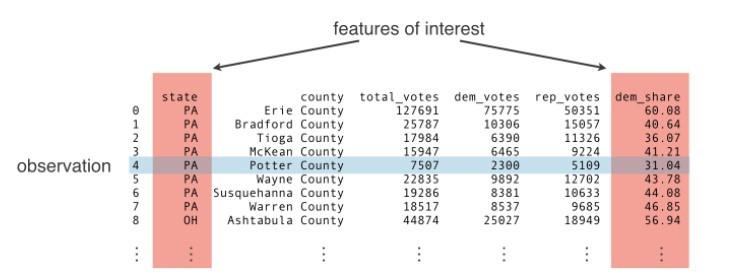

In [13]:
## Hình minh họa Image(fig1, height, width)

#### Generating a bee swarm plot
To make the plot, you need to specify which column gives the values for the `y-axis`, in this case the share of the vote that went to the Democrat Barack Obama, and the values for the `x-axis`, in this case the state. And of course, you need to tell it which DataFrame contains the data.
#### 2008 US swing state election results
From this plot, too, we can clearly see that Obama got less than 50% of the vote in the majority of counties in each of the three swing states. This time it is more detailed than a histogram, but without too much added visual complexity.

### 3.2. PRACTICES.
#### Exercise 3.2.1. Bee swarm plot
Make a bee swarm plot of the `iris petal lengths`. Your `x-axis` should contain each of the `three species`, and the `y-axis` the `petal lengths`. A data frame containing the data is in your namespace as `df`.

For your reference, the code Justin used to create the bee swarm plot in the theory is provided below:

            _ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
            _ = plt.xlabel('state')
            _ = plt.ylabel('percent of vote for Obama')
            plt.show()

#### SOLUTION.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


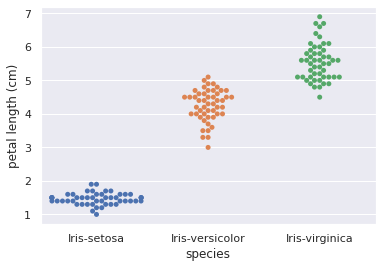

In [14]:
df = pd.read_csv(r'../input/iris/Iris.csv')
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='Species', y='PetalLengthCm', data = df)

# Label the axes
_ = plt.xlabel('species')
_ = plt.ylabel('petal length (cm)')
# Show the plot
plt.show()

#### Exercise 3.2.2. Interpreting a bee swarm plot
Which of the following conclusions could you draw from the bee swarm plot of iris petal lengths you generated in the previous exercise? For your convenience, the bee swarm plot is regenerated and shown to the right.

>- A. All `I. versicolor petals` are shorter than `I. virginica petals`.
>- B. `I. setosa petals` have a broader range of lengths than the other two species.
>- C. `I. virginica petals` tend to be the longest, and `I. setosa petals` tend to be the shortest of the three species.
>- D. `I. versicolor` is a `hybrid of I. virginica` and `I. setosa`.

#### Answer & explaination.
>- A. No, the bee swarm plot shows that a couple I. versicolor flowers had petals 5 cm or longer, and several I. virginica flowers had petals shorter than 5 cm.
>- B. I. setosa petals have a broader range of lengths than the other two species.
>- **C.** Correct! Notice that we said "tend to be." Some individual I. virginica flowers may be shorter than individual I. versicolor flowers. It is also possible that an individual I. setosa flower may have longer petals than in individual I. versicolor flower, though this is highly unlikely, and was not observed by Anderson.
>- D. Incorrect. We cannot conclude anything about the hybridization of flowers from the data describing lengths alone. It is important to interpret only what the data say and nothing more.

## 4. Plot all of your data: `ECDFs`
Imagine we wanted to plot the county-level voting data for all states east of the Mississippi River and all states west. We make the swarm plot as before, but using a DataFrame that contains all states, with each classified as being east or west of the Mississippi. The bee swarm plot has a real problem. The edges have overlapping data points, which was necessary in order to fit all points onto the plot. We are now obfuscating data. So, using a bee swarm plot here is not the best option. As an alternative, we can compute an empirical cumulative distribution function, or `ECDF`
### 4.1. Theory.
#### Empirical cumulative distribution function (ECDF).
Again, this is best explained by example. Here is a picture of an ECDF of the percentage of swing state votes that went to Obama. A x-value of an ECDF is the quantity you are measuring, in this case the percent of vote that sent to Obama. The y-value is the fraction of data points that have a value smaller than the corresponding x-value.

For example, 20% of counties in swing states had 36% or less of its people vote for Obama.

Similarly, 75% of counties in swing states had 50% or less of its people vote for Obama.

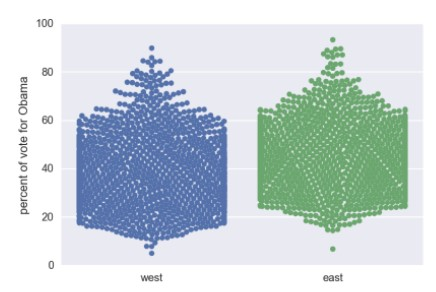

In [15]:
## Hình minh họa Image(fig1, height, width)

#### Making an ECDF
Let's look at how to make one of these from our data. 
>- The `x-axis` is the sorted data. We need to generate it using the `NumPy function sort`, so we need to import Numpy, which we do using the alias np as is commonly done. The we can use np dot sort to generate our x-data. The y-axis is evenly spaced data points with a maximum of one, which we can generate using the `np.arange` function and then dividing by the total number of data points.
>- Once we specify the `x` and `y` values, we plot the points. 
>- By `default`, `plt.plot` plots lines connecting the data points. 

To plot our `ECDF`, we just want points. 

To achieve this we pass the string period and the `string 'none'` to the keywords arguments `marker` and `linestyle`, respectively. 

As you remember from my forceful reminder in an earlier theory, we label the `axes`. Finally, we use the `plt.margins` function to make sure `none` of the data points run over the side of the plot area. Choosing a value of `point-02` gives a `2%` buffer all around the plot.

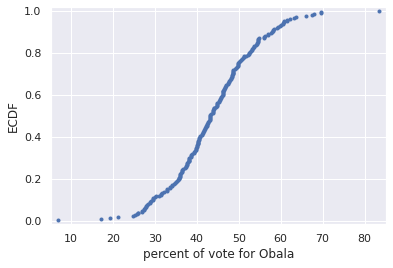

In [18]:
x = np.sort(df_swing['dem_share'])
y = np.arange(1, len(x) + 1) / len(x)
_ = plt.plot(x, y, marker = '.', linestyle = 'None')
_ = plt.xlabel('percent of vote for Obala')
_ = plt.ylabel('ECDF')
plt.margins(0.02) ## keep data off plot edges
plt.show()

#### 2008 US swing state election ECDF
The result is the beautiful `ECDF` I just showed you. We can also easily plot multiple `ECDFs` on the same plot.

For example, here are the `ECDFs` for the three swing states. We see that Ohio and Pennsylvania were similar, with Pennsylvania having slightly more Democratic counties. Florida, on the other hand, had a greater fraction of heavily Republican counties. 

In my workflow, I almost always plot the `ECDF` first. It shows all the data and gives a complete picture of how the data are distributed.

### 4.2. PRACTICES
#### Exercise 4.2.1. Computing the ECDF
In this exercise, you will write a function that takes as input a `1D array of` data and then returns the `x` and `y` values of the `ECDF`. You will use this function over and over again throughout this course and its sequel. `ECDFs` are among the most important plots in `statistical analysis`. You can write your own function, `foo(x,y)` according to the following skeleton:

            def foo(a,b):
                """State what function does here"""
                # Computation performed here
                return x, y
The function `foo()` above takes two arguments `a` and `b` and returns two values `x` and `y`. The function header `def foo(a,b):` contains the function signature `foo(a,b)`, which consists of the function name, along with its parameters.
#### SOLUTION.

In [19]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

#### Exercise 4.2.2. Plotting the ECDF
You will now use your `ecdf() function` to compute the `ECDF` for the petal lengths of Anderson's `Iris versicolor` flowers. You will then plot the `ECDF`. Recall that your `ecdf() function` returns two arrays so you will need to unpack them. An example of such unpacking is `x, y = foo(data)`, for some `function foo()`.
#### SOLUTION.

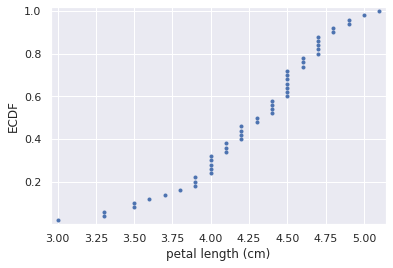

In [20]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')

# Label the axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')
_ = plt.margins(0.02)
# Display the plot
plt.show()

#### Exercise 4.2.3. Comparison of ECDFs
`ECDFs` also allow you to compare two or more distributions (though plots get cluttered if you have too many). Here, you will plot `ECDFs` for the petal lengths of all three `iris` species. You already wrote a function to generate `ECDFs` so you can put it to good use!

Remember to include `marker='.'` and `linestyle='none'` as arguments inside `plt.plot()`.
#### SOLUTION,

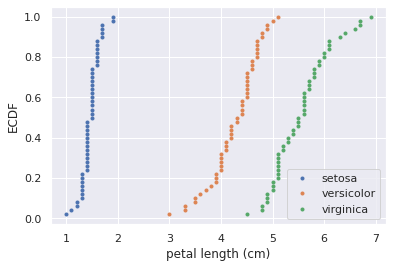

In [22]:
for k in range(3):
    # assign the species 
    species_petal_length = iris['data'][50*k:50*(k+1), 2]
    
    # Compute ECDFs (for each of the three species in iris_dataset)
    x_spec, y_spec = ecdf(species_petal_length)
    
    # Plot all ECDFs on the same plot
    _ = plt.plot(x_spec, y_spec, marker = '.', linestyle = 'none')
    
# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

The `ECDFs` expose clear differences among the species. `Setosa` is much shorter, also with less absolute variability in petal length than `versicolor` and `virginica`.

### Comments.
>- You can quickly generate and investigate a `histogram`. You can immediately get a feel for your data by plotting all of them, with bee swarm plots or `ECDFs`. In almost every data set we encounter in this course, and in its sequel, and also in real life, we start with `graphical EDA`. Remember what Tukey said,

>- “`Exploratory data analysis` can never be the whole story, but nothing else can serve as the foundation stone.” — John Tukey
"Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone."

>- In the [next chapter](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Testing%20Hypothesis/Statistical%20Thinking/Quantitative%20exploratory%20data%20analysis.ipynb), you will build upon graphical `EDA` with quantitative `EDA`, which allows you to compute useful `summary statistics`. With your foundation stone in place, you will spend the last half of this course learning to think `probabilistically`. You will learn about `probability distributions` for both `discrete` and `continuous variables`, which provide the mathematical foundation for you to draw meaningful conclusions from your data. We will not get mired in mathematical details, but rather will unleash the power of the `NumPy random module` to use hacker statistics in order to simulate the probabilistic stories and distributions that we encounter. You will find that by writing a few lines of `Python` code, you can perform even putatively complicated statistical analyses. As you work through this course and its sequel, you will grow ever closer to being able to tell what Tukey calls "the whole story."